# Seizure data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
seizures = pd.read_csv("../../Data/Validators/2016-07-11T1636.dat",
                   sep="\t", header=None, names=['start', 'end']);

## Transform data

In [2]:
seizures['start'] = seizures['start'] / 2000
seizures['end'] = seizures['end'] / 2000
seizure_start = pd.to_timedelta(seizures['start'], unit='s')
seizure_end   = pd.to_timedelta(seizures['end'], unit='s')

seizures = pd.concat([seizure_start, seizure_end], axis=1)
seizures.head()

start             end
0 00:00:38.600500 00:00:43.033000
1 00:01:00.087000 00:01:03.609000
2 00:01:12.052000 00:01:16.554000
3 00:01:29.267000 00:01:34.188000
4 00:01:43.814000 00:01:49.130000

Add length column

In [ ]:
seizures['length'] = seizures['end'] - seizures['start']
seizures['length'].describe()

In [23]:
length_in_seconds = (seizures['length'] / pd.Timedelta(seconds=1))

## Length of seizures

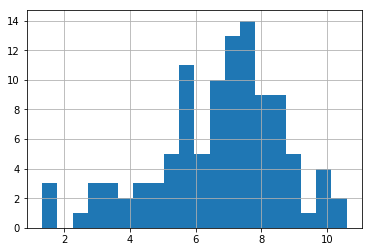

In [27]:
length_in_seconds.hist(bins=20)

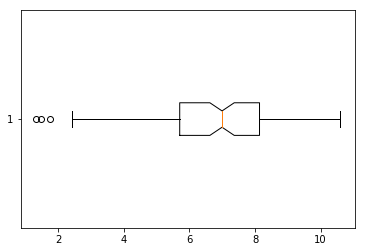

In [69]:
plt.boxplot(length_in_seconds, notch=True, vert=False);

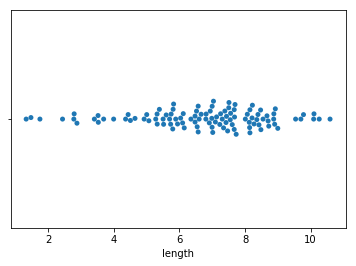

In [67]:
sns.swarmplot(x=length_in_seconds)

In [64]:
time_for_all_seizures = seizures['start'].iloc[-1]-seizures['start'].iloc[0]
seizures_per_min = seizures['start'].size / (time_for_all_seizures.seconds/60)
print('Seizures/min:', seizures_per_min)

Seizures/min: 3.933209647495362


## Time between seizures

In [49]:
seizures['time_to_seizure_before'] = seizures['end'] - seizures['start'].shift()

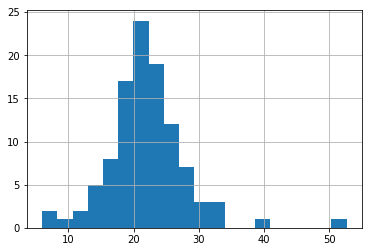

In [54]:
time_to_seizure_before_in_seconds = (seizures['time_to_seizure_before'] / pd.Timedelta(seconds=1))
time_to_seizure_before_in_seconds.hist(bins=20);

TODO time between seizures
TODO add different rats